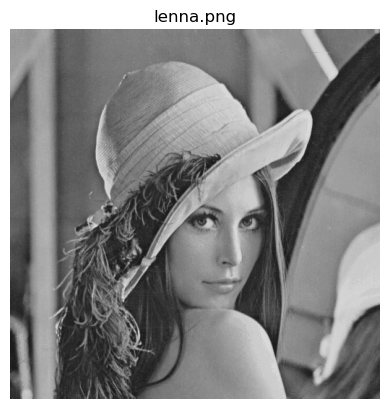

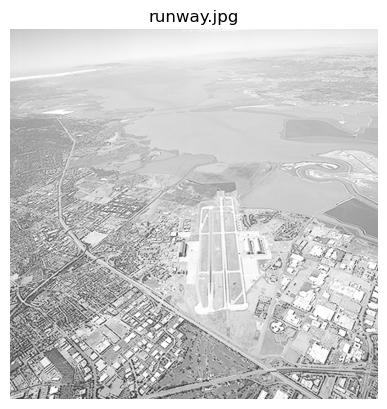

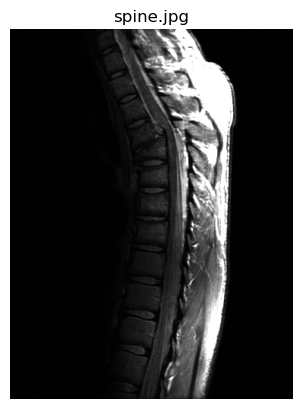

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

image_dir = "data/"
image_files = [f for f in os.listdir(image_dir) if f.endswith((".png", ".jpg", ".jpeg"))]

for image_file in image_files:
    img = cv2.imread(os.path.join(image_dir, image_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis("off")
    plt.show()

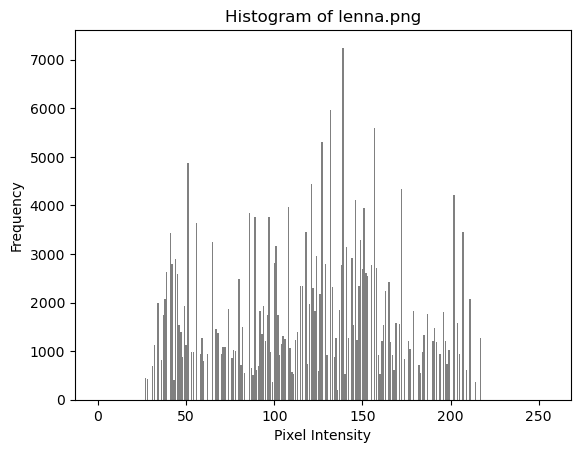

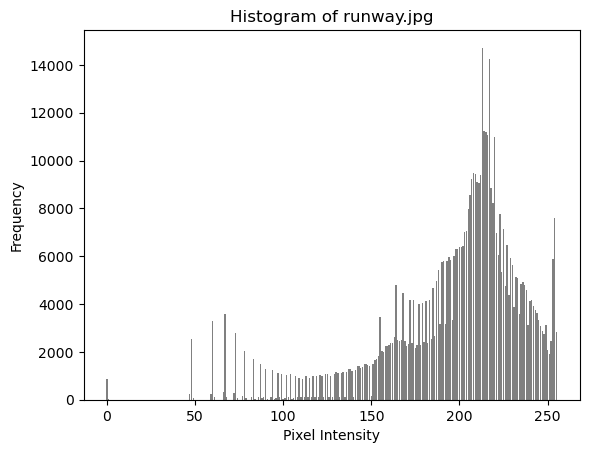

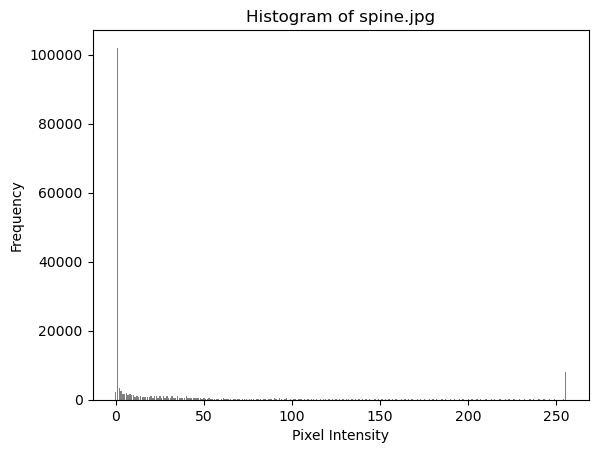

In [2]:
histograms = {}

for image_file in image_files:
    img = cv2.imread(os.path.join(image_dir, image_file), cv2.IMREAD_GRAYSCALE)
    histogram = [0] * 256
    for row in img:
        for pixel in row:
            histogram[pixel] += 1
    histograms[image_file] = histogram

for image_file, histogram in histograms.items():
    plt.figure()
    plt.bar(range(256), histogram, color="gray")
    plt.title(f"Histogram of {image_file}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

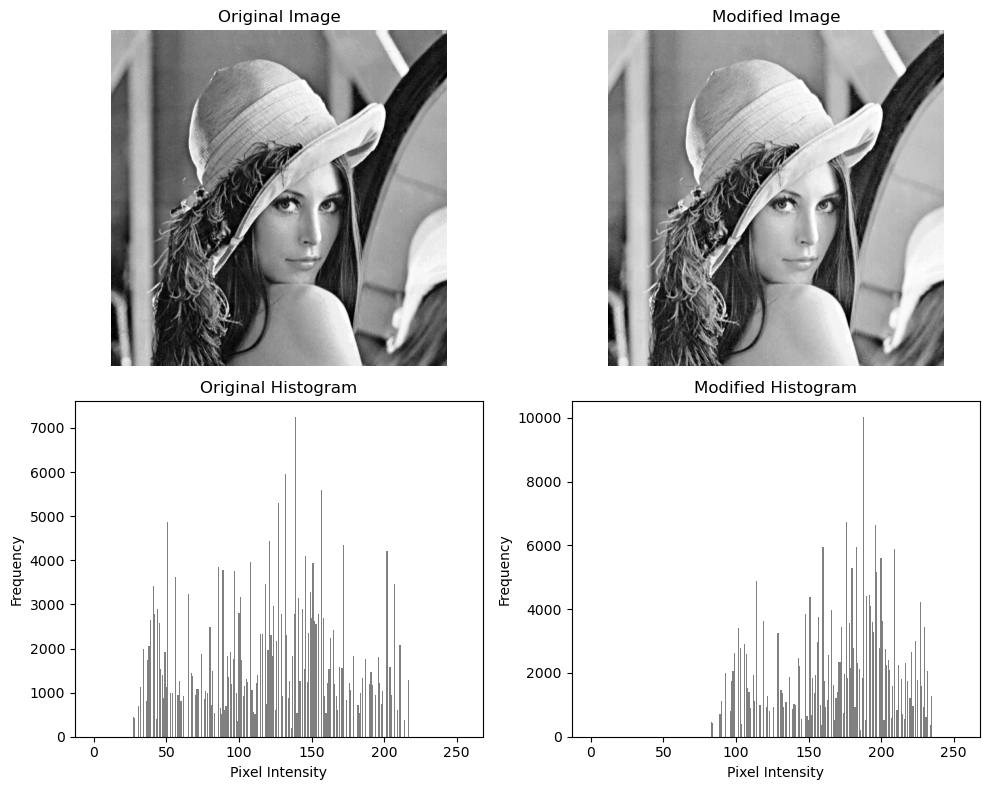

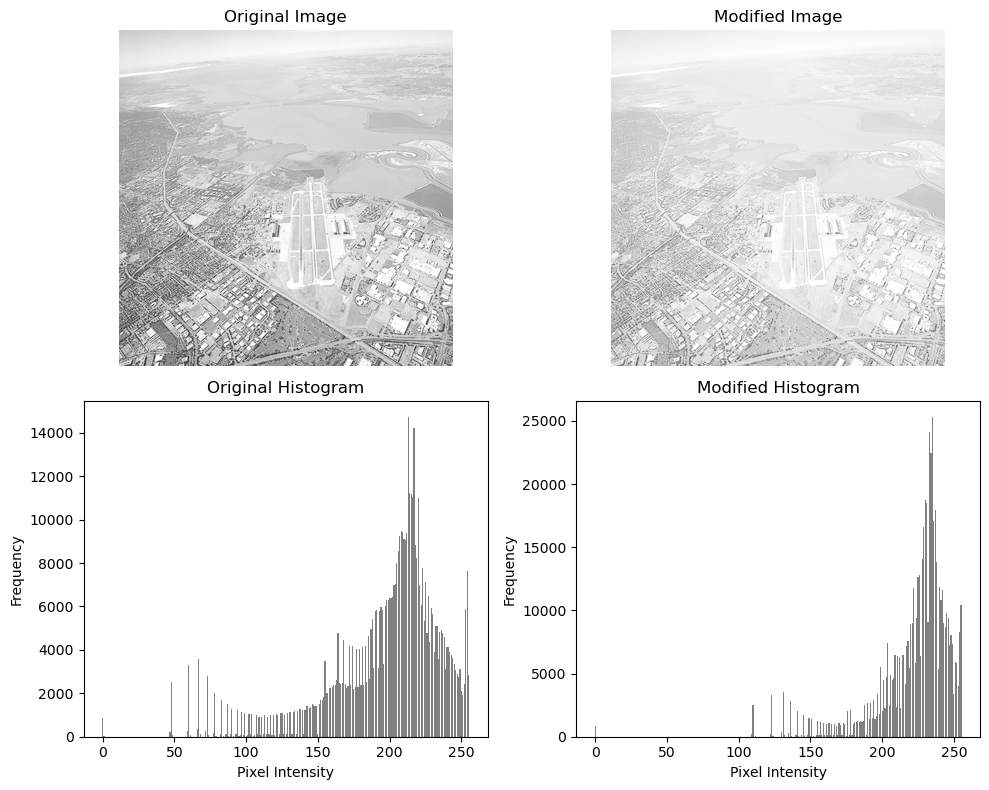

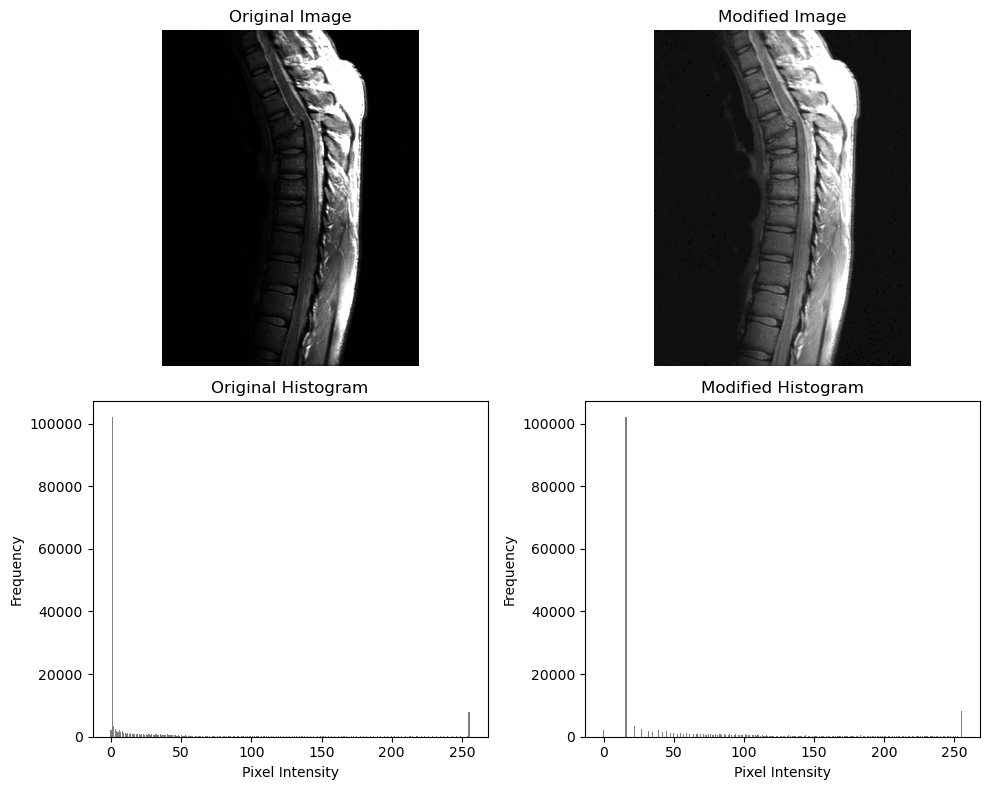

In [3]:
import numpy as np

def GrayLevelModification1(image):
    return np.clip(16 * np.sqrt(image), 0, 255).astype(np.uint8)

for image_file in image_files:
    img = cv2.imread(os.path.join(image_dir, image_file), cv2.IMREAD_GRAYSCALE)
    modified_img = GrayLevelModification1(img)

    original_hist = [0] * 256
    modified_hist = [0] * 256

    for row in img:
        for pixel in row:
            original_hist[pixel] += 1

    for row in modified_img:
        for pixel in row:
            modified_hist[pixel] += 1

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    axes[0, 0].imshow(img, cmap="gray")
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(modified_img, cmap="gray")
    axes[0, 1].set_title("Modified Image")
    axes[0, 1].axis("off")

    axes[1, 0].bar(range(256), original_hist, color="gray")
    axes[1, 0].set_title("Original Histogram")
    axes[1, 0].set_xlabel("Pixel Intensity")
    axes[1, 0].set_ylabel("Frequency")

    axes[1, 1].bar(range(256), modified_hist, color="gray")
    axes[1, 1].set_title("Modified Histogram")
    axes[1, 1].set_xlabel("Pixel Intensity")
    axes[1, 1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

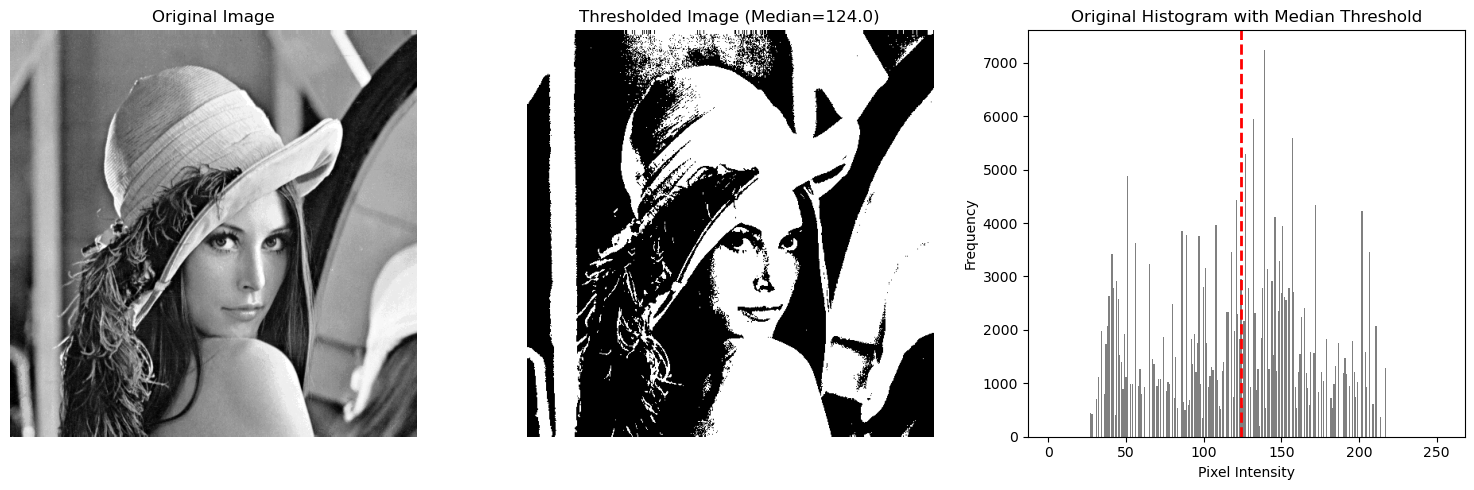

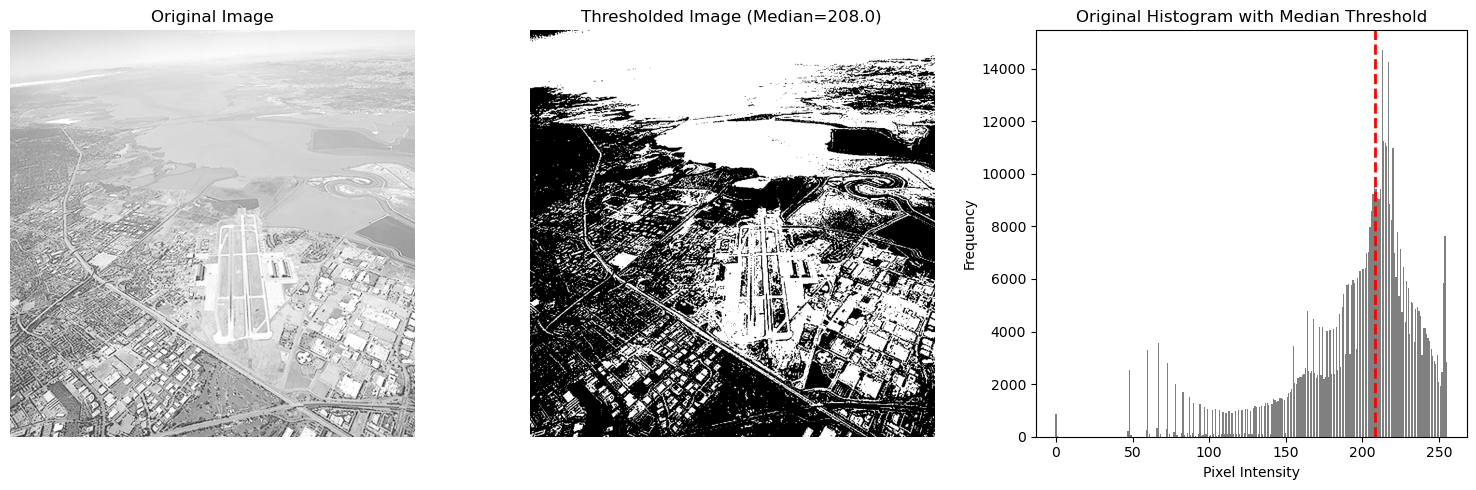

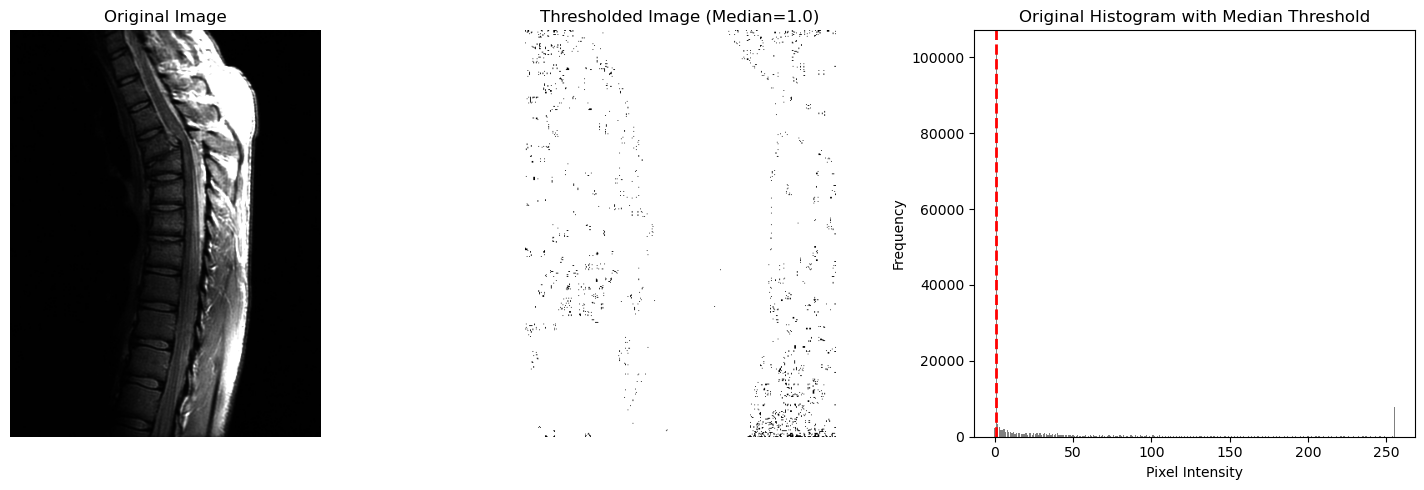

In [4]:
def MedianThreshold(image):
    flat_values = image.flatten()
    median_value = np.median(flat_values)
    thresholded_img = np.where(image >= median_value, 255, 0).astype(np.uint8)
    return thresholded_img, median_value

for image_file in image_files:
    img = cv2.imread(os.path.join(image_dir, image_file), cv2.IMREAD_GRAYSCALE)
    thresholded_img, median_value = MedianThreshold(img)

    original_hist = [0] * 256
    for row in img:
        for pixel in row:
            original_hist[pixel] += 1

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(thresholded_img, cmap="gray")
    axes[1].set_title(f"Thresholded Image (Median={median_value})")
    axes[1].axis("off")

    axes[2].bar(range(256), original_hist, color="gray")
    axes[2].axvline(median_value, color='red', linestyle='dashed', linewidth=2)
    axes[2].set_title("Original Histogram with Median Threshold")
    axes[2].set_xlabel("Pixel Intensity")
    axes[2].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

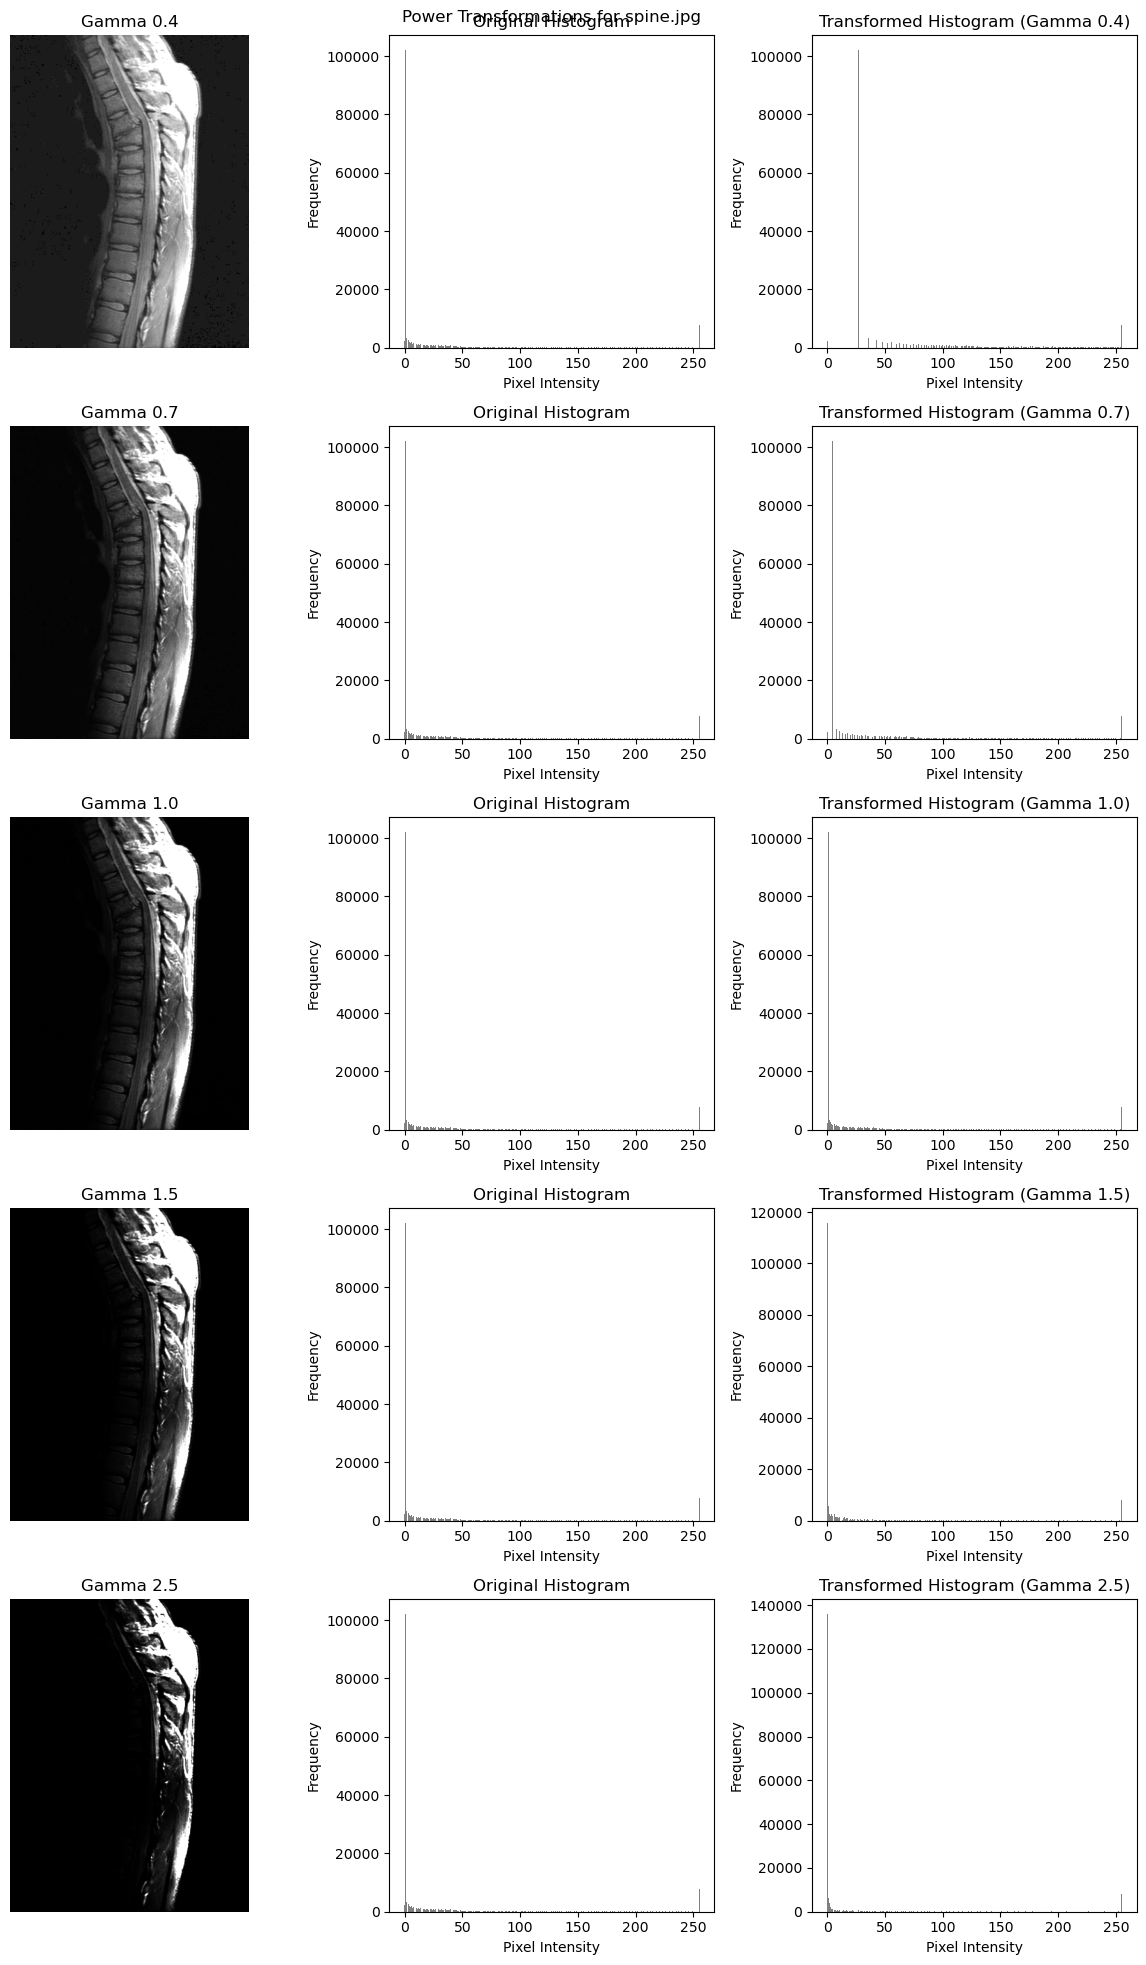

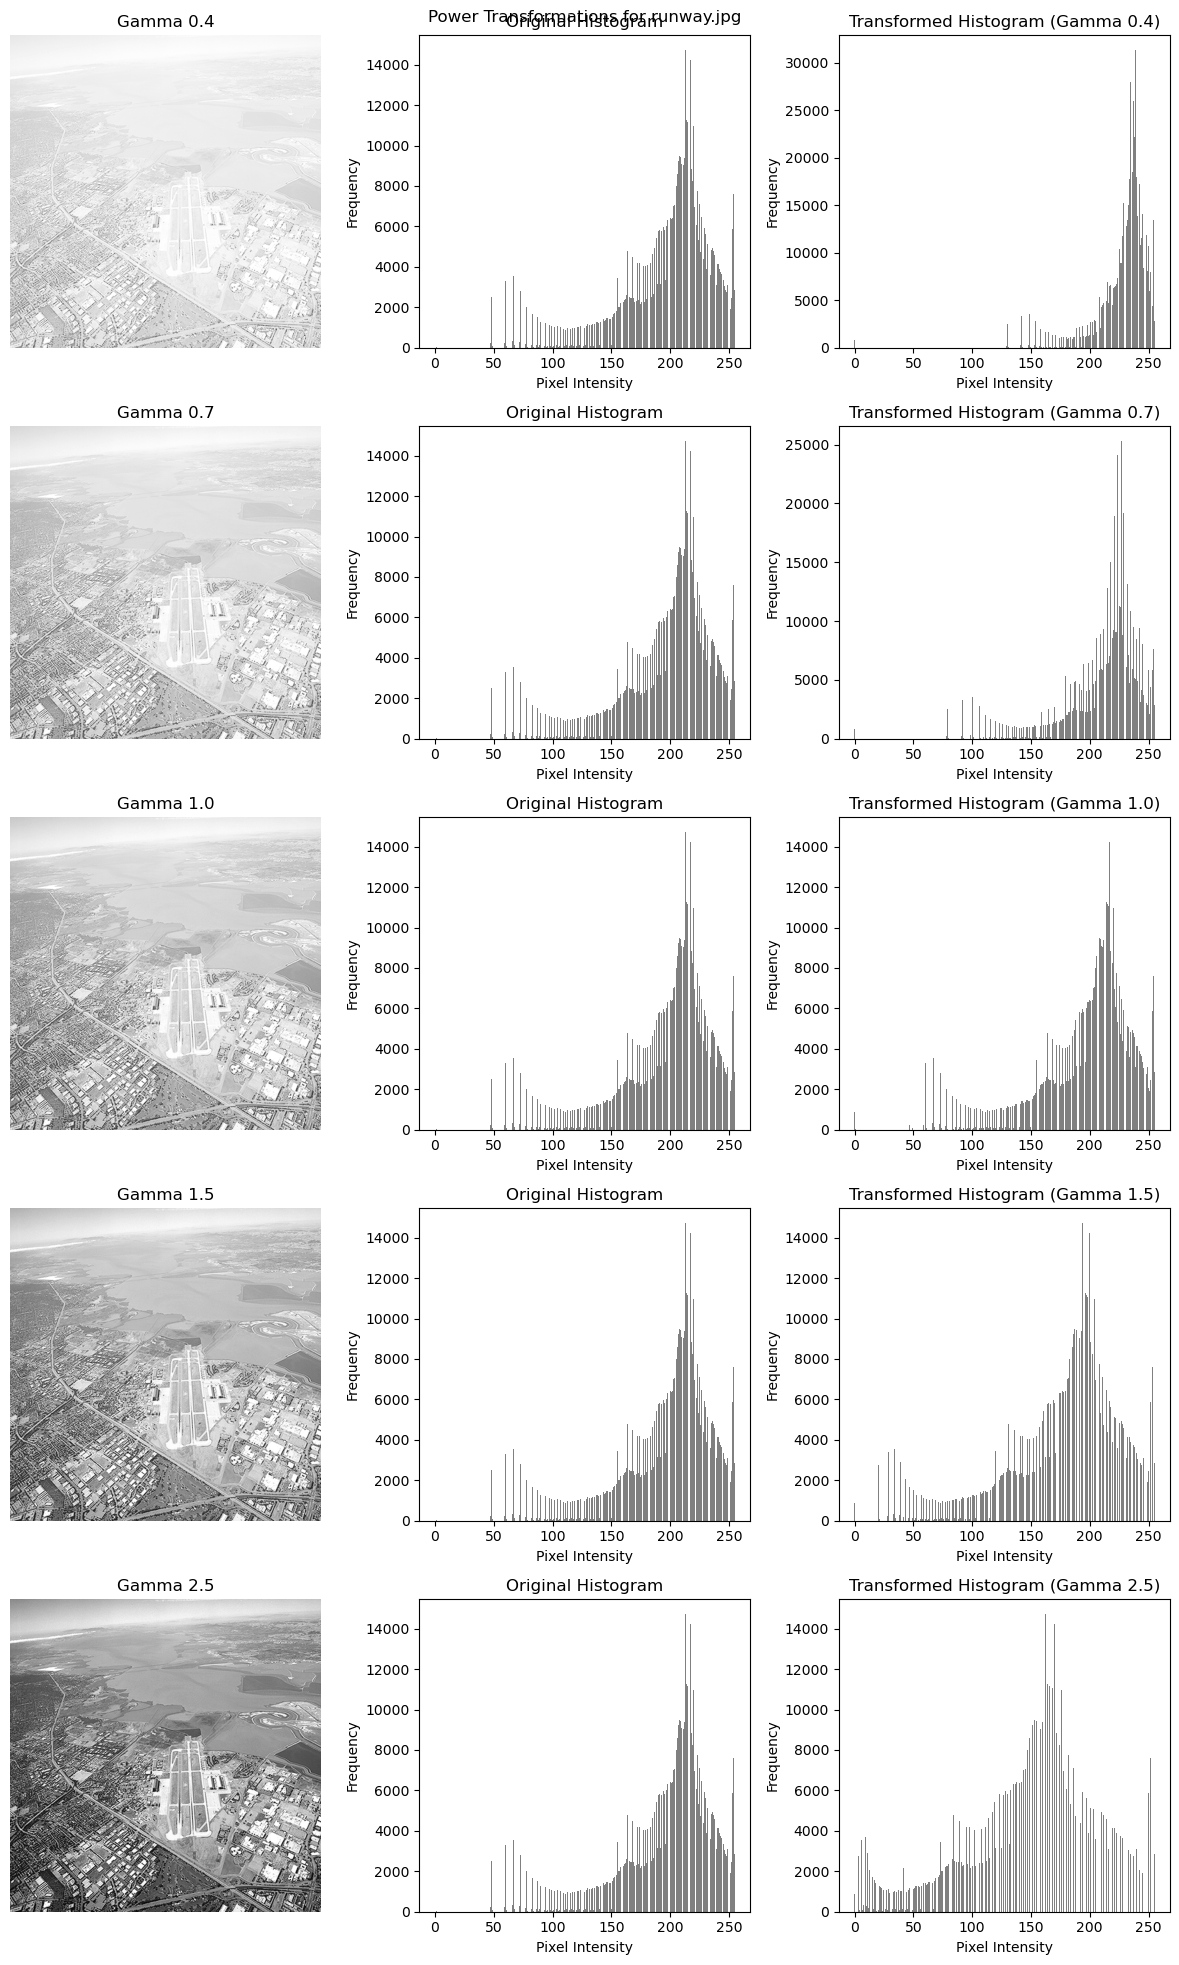

In [5]:

def PowerTransform(image, gamma):
    normalized_img = image / 255.0
    transformed_img = np.clip((normalized_img ** gamma) * 255, 0, 255).astype(np.uint8)
    return transformed_img

gamma_values = [0.4, 0.7, 1.0, 1.5, 2.5]

for image_file in ["spine.jpg", "runway.jpg"]:
    if image_file not in image_files:
        continue

    img = cv2.imread(os.path.join(image_dir, image_file), cv2.IMREAD_GRAYSCALE)

    fig, axes = plt.subplots(len(gamma_values), 3, figsize=(12, 4 * len(gamma_values)))

    for i, gamma in enumerate(gamma_values):
        transformed_img = PowerTransform(img, gamma)

        original_hist = [0] * 256
        transformed_hist = [0] * 256

        for row in img:
            for pixel in row:
                original_hist[pixel] += 1

        for row in transformed_img:
            for pixel in row:
                transformed_hist[pixel] += 1

        axes[i, 0].imshow(transformed_img, cmap="gray")
        axes[i, 0].set_title(f"Gamma {gamma}")
        axes[i, 0].axis("off")

        axes[i, 1].bar(range(256), original_hist, color="gray")
        axes[i, 1].set_title("Original Histogram")
        axes[i, 1].set_xlabel("Pixel Intensity")
        axes[i, 1].set_ylabel("Frequency")

        axes[i, 2].bar(range(256), transformed_hist, color="gray")
        axes[i, 2].set_title(f"Transformed Histogram (Gamma {gamma})")
        axes[i, 2].set_xlabel("Pixel Intensity")
        axes[i, 2].set_ylabel("Frequency")

    plt.suptitle(f"Power Transformations for {image_file}")
    plt.tight_layout()
    plt.show()